In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from IPython.core.display import display, HTML

display(HTML('<h1>Medical Insurance Cost Predictor</h1>'))
insurance_dataset = pd.read_csv('insurance.csv')
display(HTML('<h3>First 5 rows of dataset</h3>'))
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [123]:
display(HTML('<h3>Checking for missing values in the data set</h3>'))
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [124]:
display(HTML('<h3>Statistics about the dataset</h3>'))
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


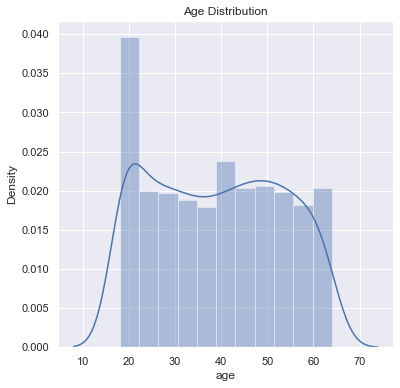

In [125]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

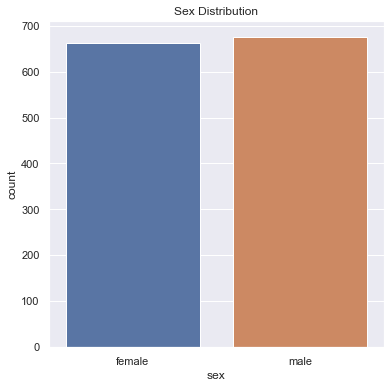

In [126]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

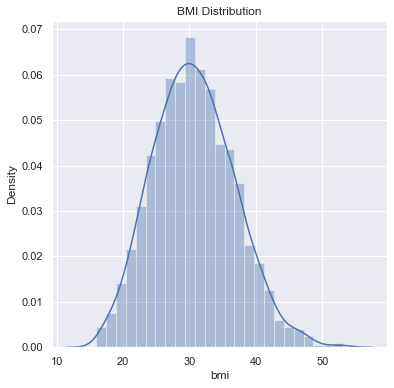

In [127]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

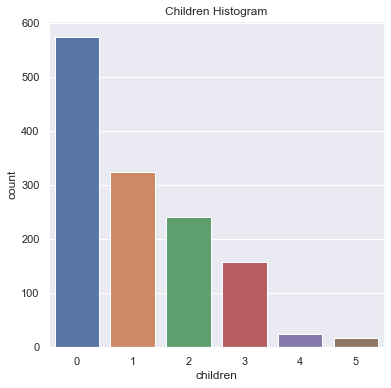

In [128]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children Histogram')
plt.show()

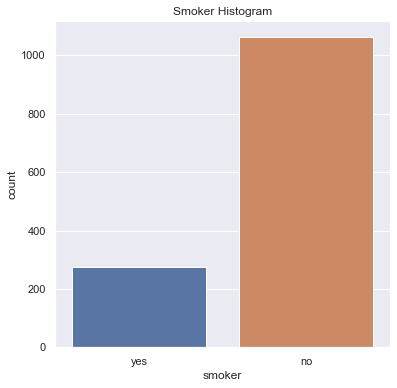

In [129]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker Histogram')
plt.show()

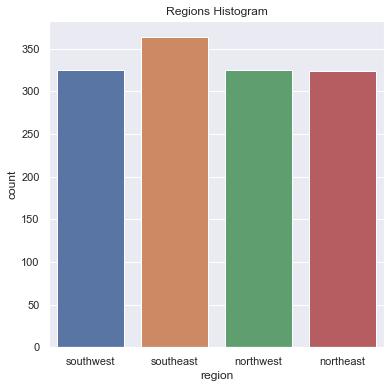

In [130]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Regions Histogram')
plt.show()

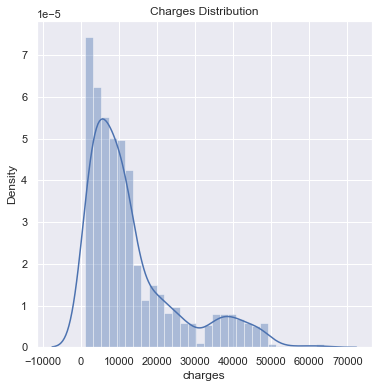

In [131]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [132]:
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

insurance_dataset.replace({'smoker':{'yes': 0, 'no': 1}}, inplace=True)

insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


The strongest correlation is between charges and smoker.


<AxesSubplot:>

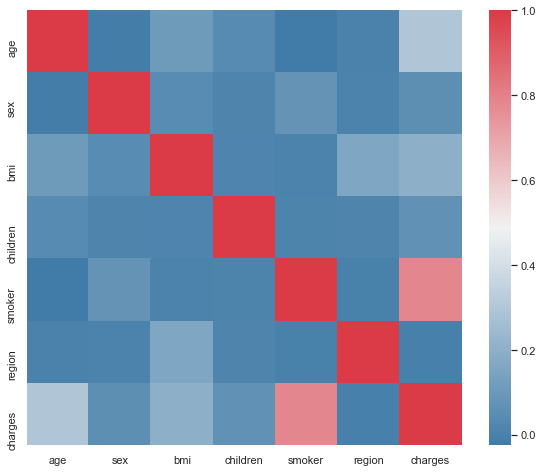

In [133]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

data.corr()['charges'].sort_values()

f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
display(HTML('<h3>Heatmap showing correlation between variables</h3>'))

print('The strongest correlation is between charges and smoker.')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [134]:
import ipywidgets as widgets

age = widgets.IntSlider(
    value=50,
    min=18,
    max=70,
    step=1,
    description='AGE:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(HTML('<h3>MEDICAL INSURANCE COST PREDICTOR</h3>'))
age



IntSlider(value=50, continuous_update=False, description='AGE:', max=70, min=18)

In [135]:
sex = widgets.Dropdown(
    options=[('Female', 1), ('Male', 0)],
    value=1,
    description='SEX:',
)

sex

Dropdown(description='SEX:', options=(('Female', 1), ('Male', 0)), value=1)

In [136]:
bmi = widgets.IntSlider(
    value=22,
    min=18,
    max=43,
    step=1,
    description='BMI:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

bmi

IntSlider(value=22, continuous_update=False, description='BMI:', max=43, min=18)

In [137]:
children = widgets.IntSlider(
    value=2,
    min=0,
    max=4,
    step=1,
    description='CHILDREN:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

children

IntSlider(value=2, continuous_update=False, description='CHILDREN:', max=4)

In [138]:
smoker = widgets.Dropdown(
    options=[('No', 1), ('Yes', 0)],
    value=1,
    description='SMOKER:',
)

smoker

Dropdown(description='SMOKER:', options=(('No', 1), ('Yes', 0)), value=1)

In [139]:
region = widgets.Dropdown(
    options=[('Southeast', 0), ('Southwest', 1), ('Northeast', 2), ('Northwest', 3)],
    value=1,
    description='REGION:',
)


region

Dropdown(description='REGION:', index=1, options=(('Southeast', 0), ('Southwest', 1), ('Northeast', 2), ('Nort…

In [140]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

training_data_prediction = regressor.predict(X_train)

r2_train = metrics.r2_score(Y_train, training_data_prediction)

test_data_prediction = regressor.predict(X_test)

r2_test = metrics.r2_score(Y_test, test_data_prediction)

#input_data = (31,1,25.74,0,1,0)

print('Performance of linear regression model (R squared value): ', r2_train) 


Performance of liner regression model (R squared value):  0.751505643411174


In [141]:
from IPython.display import clear_output

button = widgets.Button(description='Prediction')
out = widgets.Output()

def on_button_clicked(_):
      # "linking function with output"
      with out:
          # what happens when we press the button
            clear_output()
            input_data = (age.value, sex.value, bmi.value, children.value, smoker.value, region.value)
            input_data_as_numpy_array = np.asarray(input_data)
            input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
            prediction = regressor.predict(input_data_reshaped)
            print('The predicted insurance cost is: $', prediction[0])
        
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([button,out])